<a href="https://colab.research.google.com/github/HammadN98/pytorch/blob/main/01_Pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.3.0+cu121'

1. Preparacao dos Dados e Carregamento
2. Construcao do Modelo
3. Fitting modelo e treinamento
4. Fzendo previsoes e avaliando o treinamento
5. Salvando e carregando o modelo treinado
6. Juntando tudo

### Preparacao dos Dados e Carregamento

Dados podem ser quase qualquer coisa em Machine Learn

* Planilha Excel
* Images of any Kind
* Videos(Youtube tem um tiquinho de dados)
* Audio
* DNA
* Texto

Machine Learn e divido em duas principais parte:

1. Transformar os dados em representacao numerica.
2. Construir um modelo para aprender padroes em tal representacao numerica.

Vamos demonstrar isso atraves da criacao de dados conhecidos feitos por uma Regressao Linear.

A formula da Regressao Linar sera usada para fazer uma linha reta com os **parametros** conhecidos

In [3]:
#Criando Parametros conhecidos
weight = 0.7
bias = 0.3

#Criando a regressao
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
X.shape, X.squeeze().shape

(torch.Size([50, 1]), torch.Size([50]))

### Dividindo em treino e test

In [5]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plotando os dados de traino, teste e comparando com as predicoes.
  """
  plt.figure(figsize=(10, 7))

  # Plot dos dados de treino em azul
  plt.scatter(train_data, train_labels, c='b', s=4, label='Dados de Treino')

  # Plot dos dados de test em verde
  plt.scatter(test_data, test_labels, c='g', s=4, label="Dados de Treino")

  # Predicoes, se tiver
  if predictions is not None:
    # Plot da predicao, caso existe, em vermelho
    plt.scatter(X_test, predictions, c='r', s=5, label='Predicoes')

  # LEgenda
  plt.legend(prop={"size": 14});



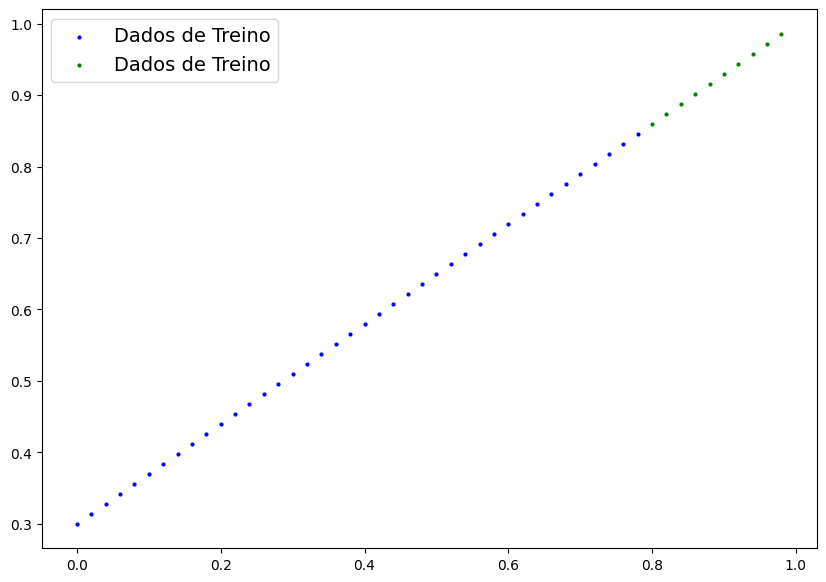

In [7]:
plot_predictions()

Funcionamento do modelo:
* Comeca com valores aleatorios(weight & bias)
* Olha para os dados de treino e ajusta os valores aleatorios para melhor representar(ou chegar perto de) os valores ideais.(os valores de weight & bias usads para criar nossos dados)

Como eh feito?

Por meio de dois algoritmos principais:
1. Gradient descent
2. Backpropagation

In [8]:
# Criando a classe do Modelo de Regressao Linear
class LinearRegressionModel(nn.Module): # <- Herda de nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, #COmeca com height aleatorio e tenta se ajudar para o valor idela

                                            requires_grad=True, # Esse parametro pode ser atualizado pelo gradiente decendente?
                                            dtype=torch.float)) # Tipo de dado padrao do Pytorch float32

    self.bias = nn.Parameter(torch.randn(1, #Comeca com o bias aleatorio e tenta se ajustar ao valor ideal
                                         requires_grad=True,  # Esse parametro pode ser atualizado pelo gradiente decendente?
                                         dtype=torch.float)) # Tipo de dado padrao do Pytorch float32

  # Método forward para definir o cálculo no modelo
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" e o dado de entrada
    return self.weights * x + self.bias # Formula da Regressao Linear


### Checando o conteudo do modelo Pytorch

* Para checar os parametros ou o que esta dentro do modelo, use, **.parameters()**.

In [9]:
#seed random
torch.manual_seed(42)

#Instanciando o modelo(isso eh uma subclase do nn.Module)
model_0 = LinearRegressionModel()

#Chacando os parametros
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
#LIstando os parametros cm nome(usando dicionarios)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Valor ideal:
weight: 0.7
bias: 0.3

### Prevendo usando torch.inference_mode()

Para checar o poder de precisao do modelo, prevomos y_test com base no X_test

Ao passar dados pelo modelo, eles iram rodar pelo metodo forward(

In [11]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

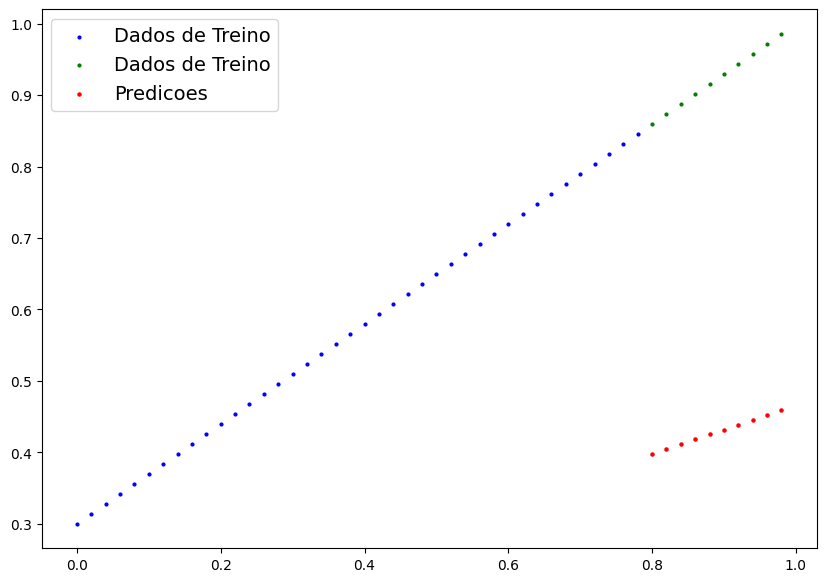

In [13]:
plot_predictions(predictions=y_preds)

### Treinando o modelo

A ideia geral do treino eh sair de parametros desconhecidos(talvez aleatorios) para parametros conhecidos.

Ou seja para uma representacao que nao condiz com a realidade de nossos dados, para uma que representa a realidade.

loss function -> Maneira de mensuarar o quao "pobre" ou nao condizente com a realidade as predicoes do nosso modelo sao.

loss function = cost function = criterion

Coisas necessarias para treinar:

* **Loss Function** lower is better
* **Optimizer** Leva em consideracao a perca(loss) do modelo e ajusta os parametros(peso e bias, neste caso) para melhorar o perca(perdendo menos)

* 'params' - Os parametros do modelo que que gostaria de oxtimizar. EX: "params=model_0.parameters()"
* lr - O "Learning Rate" eh um hyperparametro que define o quao grande/pequena sera o salto de valores dos paramentros a cada passo.

Especificamente para Pytorch:

* Um loop de treino
* Um loop de teste


In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
#CHecando os parametros do modelo. Um paramentro eh um valor que o modelo definiu ele mesmo
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
#Loss Function Mede o quao errado o Modelo esta
loss_fn = nn.L1Loss()

#Optimizer Ajusta esses parametros para reduzir a perca/loss
optimizer = torch.optim.SGD(params=model_0.parameters(), #Stochastic Gradient Descent
                            lr=0.01) # lr = Learning Rate = Possivelmente o hyperparamentro mais importante que tu pode escolher

Exemplodo lr usando bias
Se lr = 0.1 pula o 0."1"288
se le =0.01 pula o 0.1"2"88
Se lr= 0.001 pula 0 0.12"8"8
pula significa usar o valor p cima ou p baixo "mudar" o valor

In [18]:
loss_fn

L1Loss()

*Q* Qual "loss Function" e "Optimizer" usar?
 * Depende do problema, com experiencia se pega.
 * Para regressao pode ser "Loss function" = nnL1Loss() e "optimizer" = torch.optim.SGD()
 * Para regressao pode ser "Loss Function" = nn.BCELoss()

### Construindo o loop de Treino/Teste in Pytorch

COisas necessarias para o Loop

0. Passar pelos Dados e fazer... Um "for" com todos os outros passos dentro
1. Forward pass (Envolve passar os dados pelas funcoes "forward") para fazer previsoes nos dados - Tambem chamado de "forward propagation"
2. Calcular a perca/loss (Comparar as "forward pass" predicoes com os labekls verdadeiros
3. Optimizar "zero grad"
4. "Loss backward" - "VOlta pra tras pela rede" para calcular os gradientes de cada um dos arametros com respeito a perca/loss (**backpropagation**)
5. Optimizer step - Usa o otimizador para ajustar os paramentros do modelo e tentar melhorar a perca (**gradient descent**)


In [ ]:
#"epoch" e um valor utilizador para a quantidade do loop (eh um hyperparametro, ja que nos definimos)
epochs =1

# 0.Lood dos dados
for epoch in range(epochs)
  #Seta o modelo pra modo treino
  model_0.train() # Modo treino in Pytorch seta todos os parametros que requerem gradinete para requererem gradient

  model_0.eval() # Desligado o rastreamento do gradiente